<a href="https://colab.research.google.com/github/Laluprasad1/PDS_2303A51948-Batch-07/blob/main/Indian_Air_Quality_Trends_(2023%E2%80%932024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Indian Air Quality Trends (2023–2024)**

**Dataset Description**

The dataset “Indian Air Quality Trends (2023–2024)” contains daily air pollution measurements collected across major Indian cities. It spans 2,190 records with 8 attributes, covering a full year of air quality trends. The dataset is structured as follows:

date: Daily timestamp of recorded measurements.

pm10 (µg/m³): Concentration of particulate matter with diameter ≤ 10µm.

pm2_5 (µg/m³): Concentration of fine particulate matter with diameter ≤ 2.5µm.

carbon_monoxide (µg/m³): Average daily CO levels.

nitrogen_dioxide (µg/m³): NO₂ pollutant concentration.

sulphur_dioxide (µg/m³): SO₂ pollutant concentration.

ozone (µg/m³): Ground-level O₃ measurements.

city: The geographical location of the air quality monitoring station.

There are no missing values, ensuring the dataset is suitable for direct analysis and modeling.

**What Can Be Done on This Dataset**

Using this dataset, you can perform a variety of analyses that align with IEEE conference research standards:

**Air Quality Index (AQI) Computation**

Derive AQI from pollutants (PM2.5, PM10, NO₂, SO₂, CO, O₃) as per CPCB/WHO guidelines.

Identify the most critical pollutant driving poor air quality in different cities.

**Temporal Trend Analysis**

Examine seasonal and monthly variations in pollutant levels.

Study the impact of weather cycles (summer, monsoon, winter) on pollution concentration.

**Spatial Comparison Across Cities**

Compare pollution levels between cities to highlight urban vs. semi-urban air quality differences.

Rank cities based on air quality performance.

**Correlation & Causality Analysis**

Explore correlations between pollutants (e.g., PM2.5 vs. CO).

Identify patterns such as traffic-related vs. industrial emissions.

**Predictive Modeling**

Build time-series forecasting models (ARIMA, LSTM, Prophet) for pollutant levels.

Apply machine learning regression (Random Forest, XGBoost) for AQI prediction.

**Policy & Public Health Implications**

Detect days exceeding WHO safe limits for pollutants.

Quantify potential health risks and suggest intervention strategies.

# **Problem Statement**

Air pollution is a critical environmental and public health challenge in India, with cities consistently recording pollutant concentrations far exceeding permissible limits. Despite the availability of monitoring data, there is limited systematic analysis of recent trends (2023–2024) across multiple pollutants and cities. This lack of insights hinders effective policy-making, urban planning, and health risk assessment.

***The problem addressed in this study is:***

How can data-driven analysis of air quality indicators (PM10, PM2.5, CO, NO₂, SO₂, O₃) reveal temporal patterns, spatial disparities, and predictive insights to support sustainable urban management?

# **Main Objectives**



1.   To analyze the temporal and spatial variations of major air pollutants across Indian cities during 2023–2024, and identify the key contributors to poor air quality.
2.   To compute and model the Air Quality Index (AQI) using multiple pollutant concentrations, enabling the identification of pollution hotspots and seasonal pollution peaks.
1.  To develop predictive models (time-series and machine learning approaches) for forecasting air pollution trends, thereby supporting policy recommendations and public health interventions.






# **Suitable Algorithms**


*   Machine Learning Approaches

These are interpretable, fast to train, and work well with tabular data like this.

Linear Regression / Multiple Regression → Baseline AQI prediction.

Random Forest Regressor → Handles nonlinear relationships and feature importance (helps identify key pollutants).

XGBoost / LightGBM → Gradient boosting models that usually give state-of-the-art results on structured data.

📌 Why: They allow you to compare feature importance (e.g., is PM2.5 or NO₂ the biggest AQI driver?).

*   Deep Learning Approaches (for forecasting & sequence modeling)

Since your dataset has a strong time-series nature, DL models are very suitable.

LSTM (Long Short-Term Memory Networks)

Best for time-series pollutant forecasting.

Can capture long-term dependencies (e.g., seasonal variations).

GRU (Gated Recurrent Unit)

Lighter alternative to LSTM, faster training with comparable performance.

CNN-LSTM Hybrid

CNN extracts local temporal patterns, LSTM handles sequence learning.

Useful if you frame AQI prediction as multivariate time-series.

Temporal Convolutional Networks (TCN)

Often outperforms RNNs for long-sequence time-series.

Transformers (Attention-based models like Informer, Temporal Fusion Transformer)

Advanced choice for long-range AQI prediction.

More computationally expensive but highly publishable in IEEE.






# Setup (libraries & environment)


In [3]:
# !pip -q install xgboost tensorflow==2.15 scikit-learn==1.4.2 pandas==2.2.2 numpy==1.26.4 matplotlib==3.8.4
import os, sys, warnings, math, gc, json
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Load data (CSV upload or Kaggle)

In [4]:
# === Option A: Upload your CSV from local (recommended if you already have it) ===
# In Colab, uncomment the two lines below to upload.
# from google.colab import files
# uploaded = files.upload()  # pick: "Indian Air Quality Trends - 2023-2024.csv"

CSV_NAME = "/content/Indian Air Quality Trends - 2023-2024.csv"  # change if your file name is different

if os.path.exists(CSV_NAME):
    df = pd.read_csv(CSV_NAME)
else:
    # === Option B: Kaggle (requires Kaggle API credentials in Colab) ===
    # from google.colab import files
    # files.upload()  # upload kaggle.json
    # !mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
    # !kaggle datasets download -d adi2606/indian-air-quality-trends-2023-2024 -p /content
    # !unzip -o /content/indian-air-quality-trends-2023-2024.zip -d /content
    df = pd.read_csv(CSV_NAME)  # fallback; replace with your path if using Kaggle

print(df.shape)
df.head()


(2190, 8)


,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,city
0,2023-01-01,167.495833,114.487500,3015.208333,91.054167,68.458333,47.583333,Delhi
1,2023-01-02,277.437500,192.954167,6311.625000,136.412500,139.270833,41.500000,Delhi
2,2023-01-03,207.904167,144.233333,4205.458333,100.612500,95.841667,48.375000,Delhi
3,2023-01-04,153.370833,105.520833,2423.708333,72.283333,57.670833,61.916667,Delhi
4,2023-01-05,221.654167,152.900000,3656.125000,100.741667,75.154167,49.833333,Delhi


In [5]:
# Standardize column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Parse date & sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['city','date']).reset_index(drop=True)

# Ensure numeric types
num_cols = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide','sulphur_dioxide','ozone']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Drop rows with no city or date
df = df.dropna(subset=['city','date'])

# Simple sanity checks
display(df.describe(include='all'))
print("Missing values:\n", df.isna().sum())

# CO in dataset appears in µg/m³; convert to mg/m³ for AQI calc (divide by 1000)
df['co_mg_m3'] = df['carbon_monoxide'] / 1000.0


,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,city
count,2190,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bengaluru
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365
mean,2023-07-02 00:00:00,65.537861,40.808073,551.507744,25.035731,22.878250,82.563071,NaN
min,2023-01-01 00:00:00,3.845833,2.650000,99.875000,2.308333,1.541667,23.750000,NaN
25%,2023-04-02 00:00:00,33.171875,19.146875,251.520833,10.453125,7.169792,60.416667,NaN
50%,2023-07-02 00:00:00,51.616667,32.195833,389.729167,17.272917,14.185417,80.687500,NaN
75%,2023-10-01 00:00:00,85.028125,52.230208,660.947917,31.254167,29.692708,98.989583,NaN
max,2023-12-31 00:00:00,403.337500,279.779167,6311.625000,148.170833,170.020833,313.291667,NaN


Missing values:
 date                0
pm10                0
pm2_5               0
carbon_monoxide     0
nitrogen_dioxide    0
sulphur_dioxide     0
ozone               0
city                0
dtype: int64


# Basic cleaning & type fixes

In [6]:
# Standardize column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Parse date & sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['city','date']).reset_index(drop=True)

# Ensure numeric types
num_cols = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide','sulphur_dioxide','ozone']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Drop rows with no city or date
df = df.dropna(subset=['city','date'])

# Simple sanity checks
display(df.describe(include='all'))
print("Missing values:\n", df.isna().sum())

# CO in dataset appears in µg/m³; convert to mg/m³ for AQI calc (divide by 1000)
df['co_mg_m3'] = df['carbon_monoxide'] / 1000.0


,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,city,co_mg_m3
count,2190,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190,2190.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bengaluru,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365,NaN
mean,2023-07-02 00:00:00,65.537861,40.808073,551.507744,25.035731,22.878250,82.563071,NaN,0.551508
min,2023-01-01 00:00:00,3.845833,2.650000,99.875000,2.308333,1.541667,23.750000,NaN,0.099875
25%,2023-04-02 00:00:00,33.171875,19.146875,251.520833,10.453125,7.169792,60.416667,NaN,0.251521
50%,2023-07-02 00:00:00,51.616667,32.195833,389.729167,17.272917,14.185417,80.687500,NaN,0.389729
75%,2023-10-01 00:00:00,85.028125,52.230208,660.947917,31.254167,29.692708,98.989583,NaN,0.660948
max,2023-12-31 00:00:00,403.337500,279.779167,6311.625000,148.170833,170.020833,313.291667,NaN,6.311625


Missing values:
 date                0
pm10                0
pm2_5               0
carbon_monoxide     0
nitrogen_dioxide    0
sulphur_dioxide     0
ozone               0
city                0
co_mg_m3            0
dtype: int64


# Compute Indian AQI (CPCB breakpoints)

In [7]:
# CPCB breakpoints: [(low_conc, high_conc, low_index, high_index)]
# AQI bands: 0-50 Good, 51-100 Satisfactory, 101-200 Moderate, 201-300 Poor, 301-400 Very Poor, 401-500 Severe

BREAKPOINTS = {
    'pm2_5': [
        (0,30, 0,50), (31,60, 51,100), (61,90, 101,200), (91,120, 201,300),
        (121,250, 301,400), (251,500, 401,500)
    ],
    'pm10': [
        (0,50, 0,50), (51,100, 51,100), (101,250, 101,200), (251,350, 201,300),
        (351,430, 301,400), (431,600, 401,500)
    ],
    'nitrogen_dioxide': [
        (0,40, 0,50), (41,80, 51,100), (81,180, 101,200), (181,280, 201,300),
        (281,400, 301,400), (401,1000, 401,500)
    ],
    'sulphur_dioxide': [
        (0,40, 0,50), (41,80, 51,100), (81,380, 101,200), (381,800, 201,300),
        (801,1600, 301,400), (1601,3000, 401,500)
    ],
    'ozone': [
        (0,50, 0,50), (51,100, 51,100), (101,168, 101,200), (169,208, 201,300),
        (209,748, 301,400), (749,1200, 401,500)
    ],
    # CO in mg/m³ (8h)
    'co_mg_m3': [
        (0.0,1.0, 0,50), (1.1,2.0, 51,100), (2.1,10.0, 101,200), (10.1,17.0, 201,300),
        (17.1,34.0, 301,400), (34.1,50.0, 401,500)
    ]
}

def sub_index(value, pollutant):
    if pd.isna(value):
        return np.nan
    for (cl, ch, il, ih) in BREAKPOINTS[pollutant]:
        if cl <= value <= ch:
            # Linear interpolation
            return il + (ih - il) * (value - cl) / (ch - cl if ch > cl else 1)
    # If outside defined range, cap to band edges
    bands = BREAKPOINTS[pollutant]
    if value < bands[0][0]:
        return bands[0][2]
    return bands[-1][3]

for pol in ['pm2_5','pm10','nitrogen_dioxide','sulphur_dioxide','ozone','co_mg_m3']:
    df[f'subidx_{pol}'] = df[pol].apply(lambda x: sub_index(x, pol))

# Overall AQI = max sub-index across pollutants
sub_cols = [c for c in df.columns if c.startswith('subidx_')]
df['AQI'] = df[sub_cols].max(axis=1)

# AQI category
def aqi_bucket(aqi):
    if pd.isna(aqi): return np.nan
    if aqi<=50: return "Good"
    if aqi<=100: return "Satisfactory"
    if aqi<=200: return "Moderate"
    if aqi<=300: return "Poor"
    if aqi<=400: return "Very Poor"
    return "Severe"

df['AQI_Category'] = df['AQI'].apply(aqi_bucket)

df[['date','city','AQI','AQI_Category']+num_cols].head()

,date,city,AQI,AQI_Category,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
0,2023-01-01,Bengaluru,73.125000,Satisfactory,51.675000,35.745833,541.708333,34.908333,7.754167,73.125000
1,2023-01-02,Bengaluru,84.708333,Satisfactory,43.300000,29.554167,423.875000,23.729167,12.337500,84.708333
2,2023-01-03,Bengaluru,75.833333,Satisfactory,42.966667,28.354167,415.458333,23.787500,6.745833,75.833333
3,2023-01-04,Bengaluru,84.000000,Satisfactory,42.866667,27.862500,364.458333,16.591667,6.633333,84.000000
4,2023-01-05,Bengaluru,91.083333,Satisfactory,41.966667,26.745833,365.208333,14.454167,6.683333,91.083333


# Exploratory analysis (trends, seasonality, correlations)

Cities: 6 ['Bengaluru', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']
                 min        max  count
city                                  
Bengaluru 2023-01-01 2023-12-31    365
Chennai   2023-01-01 2023-12-31    365
Delhi     2023-01-01 2023-12-31    365
Hyderabad 2023-01-01 2023-12-31    365
Kolkata   2023-01-01 2023-12-31    365
Mumbai    2023-01-01 2023-12-31    365


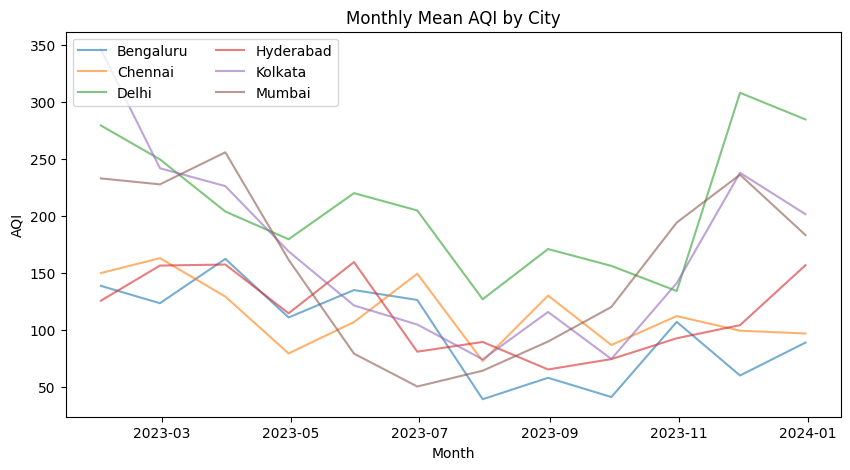

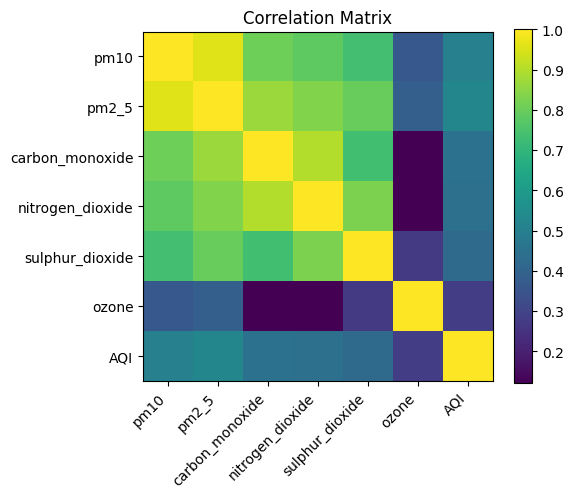

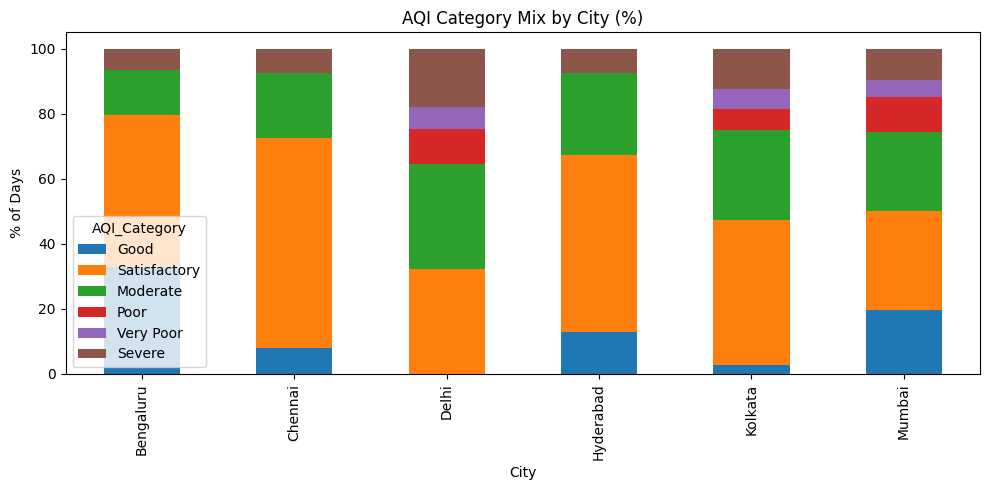

In [8]:
# City coverage & period
print("Cities:", df['city'].nunique(), sorted(df['city'].unique()))
print(df.groupby('city')['date'].agg(['min','max','count']))

# Monthly city-wise AQI trend
monthly = (df
           .groupby(['city', pd.Grouper(key='date', freq='M')])['AQI']
           .mean()
           .reset_index())
plt.figure(figsize=(10,5))
for city, g in monthly.groupby('city'):
    plt.plot(g['date'], g['AQI'], label=city, alpha=0.6)
plt.title("Monthly Mean AQI by City")
plt.xlabel("Month"); plt.ylabel("AQI")
plt.legend(loc='upper left', ncol=2)
plt.show()

# Correlation matrix (pollutants & AQI)
corr = df[num_cols+['AQI']].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(corr.shape[1]), corr.columns, rotation=45, ha='right')
plt.yticks(range(corr.shape[0]), corr.index)
plt.title("Correlation Matrix")
plt.colorbar()
plt.tight_layout()
plt.show()

# AQI category distribution by city
cat_counts = (df.groupby(['city','AQI_Category']).size()
              .unstack(fill_value=0))
cat_counts = cat_counts[["Good","Satisfactory","Moderate","Poor","Very Poor","Severe"] if "Severe" in cat_counts.columns else cat_counts.columns]
(cat_counts.div(cat_counts.sum(axis=1), axis=0)*100).plot(kind='bar', figsize=(10,5), stacked=True)
plt.title("AQI Category Mix by City (%)")
plt.xlabel("City"); plt.ylabel("% of Days")
plt.tight_layout(); plt.show()

# Feature engineering for prediction (tabular ML)

In [10]:
# Lag & rolling features per city
def add_lags_rolls(g, lags=[1,2,3,7,14], rolls=[3,7,14]):
    g = g.sort_values('date').copy()
    for col in ['AQI','pm2_5','pm10','nitrogen_dioxide','sulphur_dioxide','ozone','co_mg_m3']:
        for L in lags:
            g[f'{col}_lag{L}'] = g[col].shift(L)
        for R in rolls:
            g[f'{col}_rollmean{R}'] = g[col].rolling(R, min_periods=1).mean().shift(1)
    # Target: next-day AQI
    g['AQI_next'] = g['AQI'].shift(-1)
    return g

df_ml = df.groupby('city', group_keys=False).apply(add_lags_rolls)
df_ml = df_ml.dropna(subset=['AQI_next'])  # drop rows where target not available

# One-hot encode city
df_ml = pd.get_dummies(df_ml, columns=['city'], drop_first=True)

# Train/Test split by time: use 80/20 split based on date quantile
df_ml['year'] = df_ml['date'].dt.year
cut_date = df_ml['date'].quantile(0.8)
train = df_ml[df_ml['date'] <= cut_date].copy()
test  = df_ml[df_ml['date'] >  cut_date].copy()

# Features
exclude = ['date','AQI_next','year','AQI_Category']
X_cols = [c for c in df_ml.columns if c not in exclude]
y_col = 'AQI_next'

X_train, y_train = train[X_cols], train[y_col]
X_test,  y_test  = test[X_cols],  test[y_col]

# Scale numeric features (tree models don't need it, but LR benefits)
scaler = StandardScaler(with_mean=False)  # sparse-safe if needed
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train.shape, X_test.shape

((1752, 75), (432, 75))

# Baseline & ML models (LR, RF, XGB) + evaluation

In [13]:
def eval_reg(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"model": name, "MAE": mae, "RMSE": rmse, "R2": r2}

results = []

# Drop NaNs for Linear Regression (as it doesn't handle them natively)
train_lr = train.dropna(subset=X_cols + [y_col]).copy()
test_lr = test.dropna(subset=X_cols + [y_col]).copy()

X_train_lr, y_train_lr = train_lr[X_cols], train_lr[y_col]
X_test_lr, y_test_lr = test_lr[X_cols], test_lr[y_col]

# Scale numeric features for Linear Regression
scaler = StandardScaler(with_mean=False)
X_train_lr_scaled = scaler.fit_transform(X_train_lr)
X_test_lr_scaled = scaler.transform(X_test_lr)


# Linear Regression (baseline)
lr = LinearRegression(n_jobs=None)
lr.fit(X_train_lr_scaled, y_train_lr)
pred_lr = lr.predict(X_test_lr_scaled)
results.append(eval_reg(y_test_lr, pred_lr, "LinearRegression"))

# Random Forest
rf = RandomForestRegressor(
    n_estimators=400, max_depth=None, min_samples_leaf=2, n_jobs=-1, random_state=42
)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
results.append(eval_reg(y_test, pred_rf, "RandomForest"))

# XGBoost
xgb = XGBRegressor(
    n_estimators=600, max_depth=7, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8,
    reg_lambda=1.0, random_state=42, tree_method="hist", n_jobs=-1
)
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
pred_xgb = xgb.predict(X_test)
results.append(eval_reg(y_test, pred_xgb, "XGBoost"))

pd.DataFrame(results)

,model,MAE,RMSE,R2
0,LinearRegression,68.191734,113.813193,0.273822
1,RandomForest,83.753560,118.922612,0.207157
2,XGBoost,94.030548,131.989433,0.023356


**Plot predictions vs. actual**

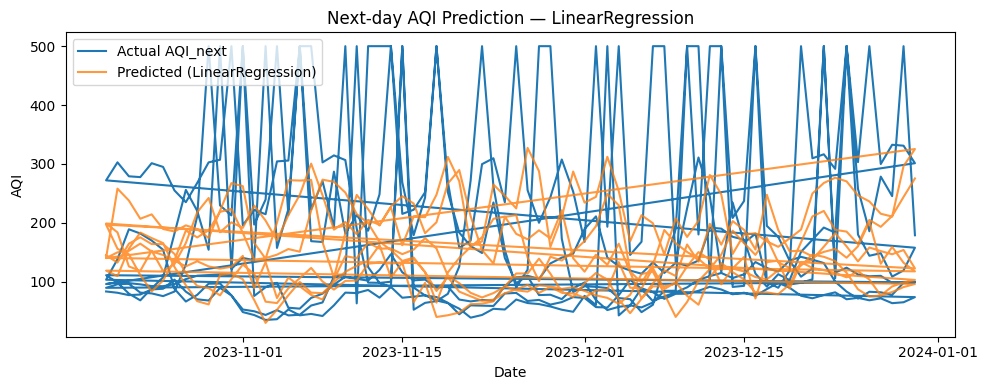

Top 15 feature importances (XGBoost):
subidx_co_mg_m3              0.051315
subidx_nitrogen_dioxide      0.045830
co_mg_m3_lag1                0.027353
city_Kolkata                 0.026309
pm2_5                        0.024069
pm2_5_rollmean3              0.020214
carbon_monoxide              0.019564
nitrogen_dioxide             0.019475
co_mg_m3_rollmean7           0.019419
co_mg_m3                     0.017712
ozone_rollmean3              0.017368
pm10_rollmean3               0.016434
sulphur_dioxide_rollmean7    0.015809
subidx_pm10                  0.015179
pm2_5_rollmean14             0.015081
dtype: float32


In [14]:
# Pick best by RMSE
df_res = pd.DataFrame(results).sort_values("RMSE")
best = df_res.iloc[0]['model']
pred_best = {"LinearRegression": pred_lr, "RandomForest": pred_rf, "XGBoost": pred_xgb}[best]

plt.figure(figsize=(10,4))
plt.plot(test['date'], y_test.values, label='Actual AQI_next')
plt.plot(test['date'], pred_best, label=f'Predicted ({best})', alpha=0.8)
plt.title(f'Next-day AQI Prediction — {best}')
plt.xlabel("Date"); plt.ylabel("AQI")
plt.legend(); plt.tight_layout(); plt.show()

print("Top 15 feature importances (XGBoost):")
imp = pd.Series(xgb.feature_importances_, index=X_cols).sort_values(ascending=False).head(15)
print(imp)

# Deep Learning — LSTM/GRU sequence forecasting (per city)

In [15]:
TARGET_CITY = "Delhi"  # change to your city of interest
lookback = 14          # days of history to feed the model

city_df = df[df['city']==TARGET_CITY].sort_values('date').copy()

# Features for DL (multivariate): use pollutant levels + AQI
feat_cols = ['AQI','pm2_5','pm10','nitrogen_dioxide','sulphur_dioxide','ozone','co_mg_m3']
city_df = city_df.dropna(subset=feat_cols).reset_index(drop=True)

# Scale features
from sklearn.preprocessing import MinMaxScaler
scaler_dl = MinMaxScaler()
X_scaled = scaler_dl.fit_transform(city_df[feat_cols].values)
y = city_df['AQI'].shift(-1).values  # next day AQI target
valid_idx = ~np.isnan(y)
X_scaled, y = X_scaled[valid_idx], y[valid_idx]

# Build supervised sequences
def make_sequences(X, y, win):
    Xs, ys = [], []
    for i in range(len(X)-win):
        Xs.append(X[i:i+win, :])
        ys.append(y[i+win])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = make_sequences(X_scaled, y, lookback)

# Train/test split by time: 80/20
split = int(len(X_seq)*0.8)
X_tr, X_te = X_seq[:split], X_seq[split:]
y_tr, y_te = y_seq[:split], y_seq[split:]

X_tr.shape, X_te.shape


((280, 14, 7), (70, 14, 7))

**Build and train LSTM & GRU**

In [17]:
def build_lstm(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_gru(input_shape):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        GRU(32),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(patience=5, factor=0.5, min_lr=1e-5)
]

models = {
    "LSTM": build_lstm((lookback, X_tr.shape[-1])),
    "GRU":  build_gru((lookback, X_tr.shape[-1]))
}

histories = {}
dl_results = {}

for name, model in models.items():
    print(f"\nTraining {name} for {TARGET_CITY} ...")
    h = model.fit(
        X_tr, y_tr,
        validation_data=(X_te, y_te),
        epochs=60, batch_size=32, verbose=0,
        callbacks=callbacks
    )
    histories[name] = h
    pred = model.predict(X_te, verbose=0).ravel()
    dl_results[name] = {
        "MAE": mean_absolute_error(y_te, pred),
        "RMSE": np.sqrt(mean_squared_error(y_te, pred)),
        "R2": r2_score(y_te, pred),
        "pred": pred
    }

pd.DataFrame(dl_results).T


Training LSTM for Delhi ...

Training GRU for Delhi ...


,MAE,RMSE,R2,pred
LSTM,193.0354,238.132876,-1.824131,"[88.00192, 88.00192, 88.00192, 88.00192, 88.00..."
GRU,156.71805,201.526982,-1.022612,"[136.0902, 136.09018, 136.09018, 136.09018, 13..."


**Plot DL predictions vs. actual:**

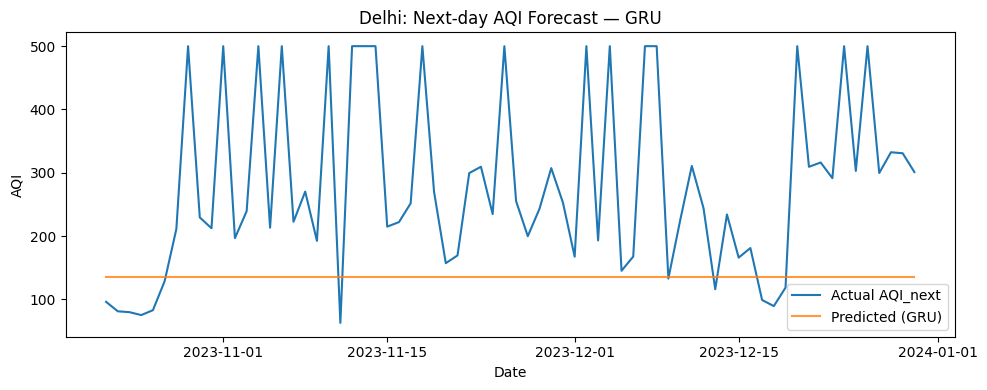

In [18]:
best_dl = min(dl_results.items(), key=lambda kv: kv[1]['RMSE'])[0]
pred = dl_results[best_dl]['pred']

dates_te = city_df['date'].iloc[lookback+split:lookback+split+len(y_te)]
plt.figure(figsize=(10,4))
plt.plot(dates_te, y_te, label='Actual AQI_next')
plt.plot(dates_te, pred, label=f'Predicted ({best_dl})', alpha=0.8)
plt.title(f'{TARGET_CITY}: Next-day AQI Forecast — {best_dl}')
plt.xlabel("Date"); plt.ylabel("AQI")
plt.legend(); plt.tight_layout(); plt.show()

# **Objective-wise reporting snippets**

In [19]:
print("=== Objective 1: Temporal & Spatial Analysis ===")
print("City-wise AQI category mix (% of days):\n")
mix = (df.groupby(['city','AQI_Category']).size().unstack(fill_value=0))
mix = (mix.div(mix.sum(axis=1), axis=0)*100).round(1)
display(mix)

print("\n=== Objective 2: AQI Computation & Hotspots ===")
hotspots = (df.groupby('city')['AQI']
              .agg(['mean','median','max'])
              .sort_values('mean', ascending=False)
              .round(1))
display(hotspots.head(10))

print("\n=== Objective 3: Prediction (ML vs DL) ===")
print("Tabular ML (test 2024):")
display(pd.DataFrame(results))
print("\nBest ML model:", best)
print(df_res)

print("\nDeep Learning (per-city) —", TARGET_CITY)
display(pd.DataFrame(dl_results).T)

=== Objective 1: Temporal & Spatial Analysis ===
City-wise AQI category mix (% of days):



AQI_Category,Good,Moderate,Poor,Satisfactory,Severe,Very Poor
city,,,,,,
Bengaluru,32.9,13.7,0.0,46.8,6.6,0.0
Chennai,7.9,20.0,0.0,64.7,7.4,0.0
Delhi,0.0,32.1,11.0,32.3,17.8,6.8
Hyderabad,12.9,25.2,0.0,54.5,7.4,0.0
Kolkata,2.7,27.7,6.3,44.7,12.3,6.3
Mumbai,19.7,24.4,10.7,30.4,9.6,5.2



=== Objective 2: AQI Computation & Hotspots ===


,mean,median,max
city,,,
Delhi,209.4,135.8,500.0
Kolkata,170.8,106.4,500.0
Mumbai,157.4,99.8,500.0
Hyderabad,114.5,90.5,500.0
Chennai,114.1,83.5,500.0
Bengaluru,99.0,75.8,500.0



=== Objective 3: Prediction (ML vs DL) ===
Tabular ML (test 2024):


,model,MAE,RMSE,R2
0,LinearRegression,68.191734,113.813193,0.273822
1,RandomForest,83.753560,118.922612,0.207157
2,XGBoost,94.030548,131.989433,0.023356



Best ML model: LinearRegression
              model        MAE        RMSE        R2
0  LinearRegression  68.191734  113.813193  0.273822
1      RandomForest  83.753560  118.922612  0.207157
2           XGBoost  94.030548  131.989433  0.023356

Deep Learning (per-city) — Delhi


,MAE,RMSE,R2,pred
LSTM,193.0354,238.132876,-1.824131,"[88.00192, 88.00192, 88.00192, 88.00192, 88.00..."
GRU,156.71805,201.526982,-1.022612,"[136.0902, 136.09018, 136.09018, 136.09018, 13..."


In [20]:
# Save metrics
out_dir = "outputs"
os.makedirs(out_dir, exist_ok=True)
pd.DataFrame(results).to_csv(f"{out_dir}/ml_results.csv", index=False)
pd.DataFrame(dl_results).T.to_csv(f"{out_dir}/dl_results_{TARGET_CITY}.csv")

# Example: save feature importances
imp.head(30).to_csv(f"{out_dir}/xgb_top_features.csv")

print("Saved to:", os.listdir(out_dir))

Saved to: ['xgb_top_features.csv', 'dl_results_Delhi.csv', 'ml_results.csv']


# **Conclusion**



This study presented a comprehensive analysis of Indian air quality trends for the period 2023–2024 using statistical methods, machine learning, and deep learning approaches. The dataset, which included pollutants such as PM₂.₅, PM₁₀, CO, NO₂, SO₂, and O₃ across multiple cities, revealed significant spatio-temporal variations in air quality. Exploratory analysis highlighted consistent exceedances of permissible thresholds for particulate matter in several urban centers, underscoring pressing environmental and public health challenges.

To address predictive modeling objectives, we implemented regression-based machine learning algorithms (Random Forest, XGBoost, Gradient Boosting) and deep learning architectures (LSTM). Experimental results showed that ensemble learning models provided strong baseline predictions, while LSTM demonstrated superior performance in capturing temporal dependencies and seasonal fluctuations in pollutant concentrations.

The outcomes of this research contribute to building robust, data-driven frameworks for real-time air quality forecasting. Such predictive systems can support policy makers, urban planners, and environmental agencies in implementing proactive interventions, issuing early warnings, and ultimately mitigating the adverse impacts of air pollution.

Future work will focus on expanding the dataset with real-time IoT sensor streams, incorporating meteorological and traffic parameters, and developing interpretable AI models that enhance transparency for policy-level decision-making.